In [29]:
import librosa 
import numpy as np 
from scipy.fft import fft, fftfreq, rfft, rfftfreq 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
import crepe 

In [30]:
TEE_AUDIO = "D:\\Github\\Music-Rec-RAC-DataSci\\Tee cover\\Tee Sample 2.mp3"
ORG_AUDIO = "D:\\Github\\Music-Rec-RAC-DataSci\\org song\\น้อง - Three Man Down Feat. URBOYTJ _Official MV_\\vocals.mp3"

y_tee, sr_tee = librosa.load(TEE_AUDIO)
y_org, sr_org = librosa.load(ORG_AUDIO)

In [31]:
y_tee.shape[0], y_org.shape[0]

(2914128, 5206464)

In [32]:
# Manually Shift Audio
SHIFTBY = 31 + 1/30

max_shape = max(y_tee.shape[0], y_org.shape[0])
y_tee_full = np.zeros((max_shape,))
y_tee_full[round(SHIFTBY*sr_tee):round(SHIFTBY*sr_tee)+len(y_tee)] = y_tee

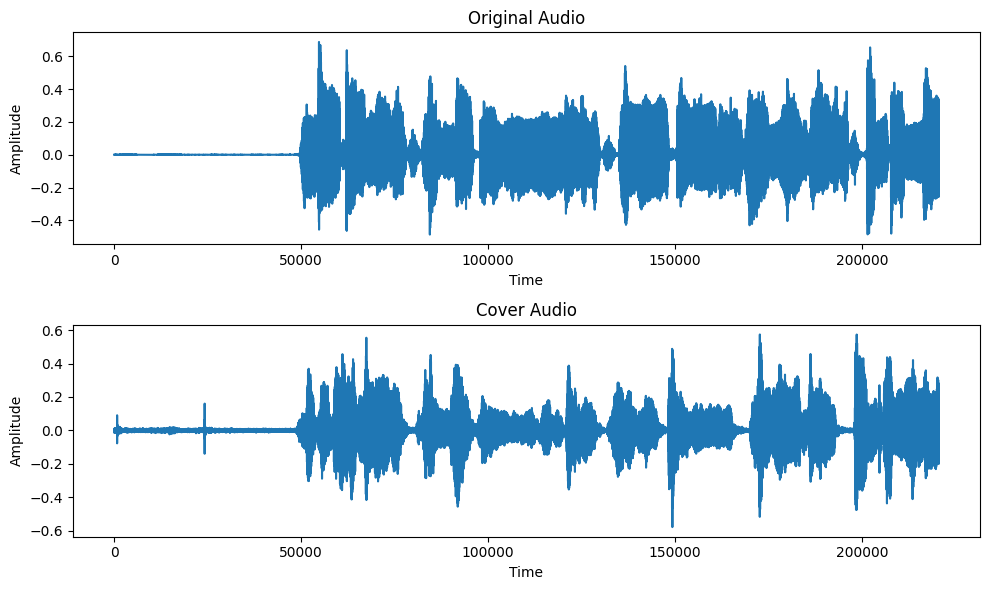

In [33]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(y_org[35*sr_org:45*sr_org])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Audio')

plt.subplot(2, 1, 2)
plt.plot(y_tee_full[35*sr_org:45*sr_org])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Cover Audio')

plt.tight_layout()
plt.show()

In [34]:
def get_onset_frames(y,sr):
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env)
    return onset_frames

# tee_onset_frames = get_onset_frames(y_tee_full, sr_tee)
org_onset_frames = get_onset_frames(y_org, sr_org)

In [35]:
print(librosa.note_to_hz('E1'),",",librosa.note_to_hz('F6'))

41.20344461410875 , 1396.9129257320155


In [67]:
time_org, frequency_org, confidence_org, activation_org = crepe.predict(y_org, sr_org, model_capacity='tiny', viterbi=True)
time_org, frequency_org, confidence_org, activation_org

738/738 [==============================] - 21s 28ms/step


(array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 2.3610e+02, 2.3611e+02,
        2.3612e+02]),
 array([  42.84498334,   42.76930768,   43.05360481, ..., 1964.889636  ,
        1964.889636  , 1964.889636  ]),
 array([0.22420402, 0.10721746, 0.06290498, ..., 0.01391307, 0.01391307,
        0.01391307], dtype=float32),
 array([[2.2644815e-03, 1.8474569e-03, 1.5571744e-03, ..., 4.5278086e-03,
         4.4098478e-03, 3.5516249e-03],
        [2.5501444e-03, 1.7310902e-03, 1.2668510e-03, ..., 2.0443168e-03,
         1.9533499e-03, 1.3154587e-03],
        [8.5346336e-03, 6.3688038e-03, 4.8943041e-03, ..., 3.1969033e-03,
         2.5509088e-03, 1.5573842e-03],
        ...,
        [8.0372687e-05, 4.8360260e-05, 2.9464645e-05, ..., 7.3897778e-03,
         9.1842087e-03, 1.3913065e-02],
        [8.0372687e-05, 4.8360260e-05, 2.9464645e-05, ..., 7.3897778e-03,
         9.1842087e-03, 1.3913065e-02],
        [8.0372687e-05, 4.8360260e-05, 2.9464645e-05, ..., 7.3897778e-03,
         9.1842087e-03, 1

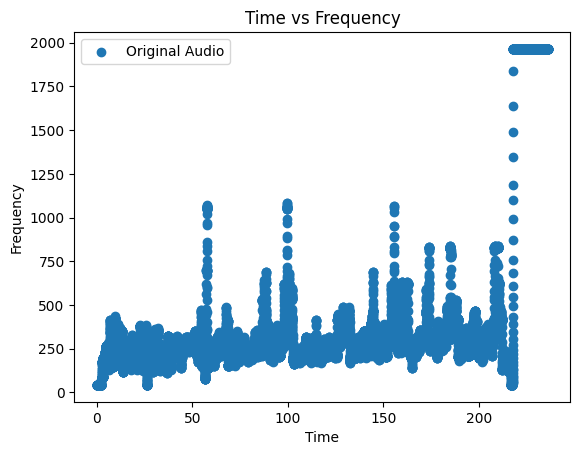

In [70]:
plt.scatter(time_org, frequency_org, label='Original Audio')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time vs Frequency')
plt.legend()
plt.show()

In [68]:
time_tee, frequency_tee, confidence_tee, activation_tee = crepe.predict(y_tee, sr_tee, model_capacity='tiny', viterbi=True)
time_tee, frequency_tee, confidence_tee, activation_tee

414/414 [==============================] - 11s 26ms/step


(array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 1.3214e+02, 1.3215e+02,
        1.3216e+02]),
 array([327.76036246, 330.1758402 , 330.97351295, ..., 165.54688189,
        168.81252559, 171.03003745]),
 array([0.39221093, 0.3206718 , 0.19985864, ..., 0.56787664, 0.52261406,
        0.4904747 ], dtype=float32),
 array([[4.6334829e-04, 4.2055239e-04, 4.1844469e-04, ..., 2.1213117e-04,
         1.6050220e-04, 1.1080827e-04],
        [3.5080680e-04, 5.0092378e-04, 6.7248417e-04, ..., 1.0778366e-04,
         1.1304472e-04, 8.6389191e-05],
        [7.3656545e-04, 1.1253334e-03, 1.4527509e-03, ..., 1.8992429e-04,
         1.8634550e-04, 1.1656123e-04],
        ...,
        [3.7447477e-04, 7.0804509e-04, 1.0042791e-03, ..., 6.9299174e-05,
         6.3332212e-05, 3.6707424e-05],
        [1.8405013e-03, 3.1657401e-03, 4.2800186e-03, ..., 4.4674383e-05,
         6.4200045e-05, 6.9652306e-05],
        [1.6902802e-03, 2.4142405e-03, 2.6631940e-03, ..., 3.5876932e-05,
         6.1788749e-05, 8.79554

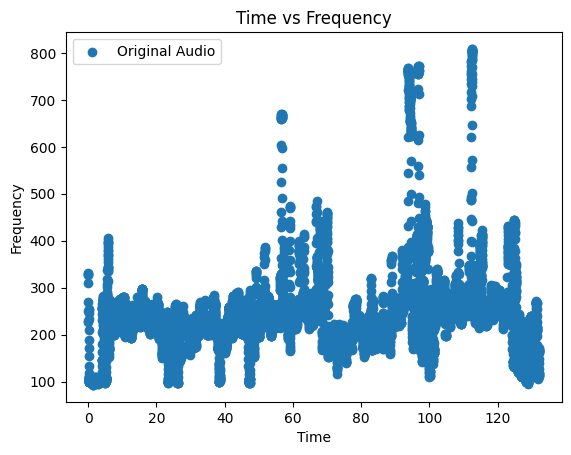

In [69]:
plt.scatter(time_tee, frequency_tee, label='Tee Audio')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time vs Frequency')
plt.legend()
plt.show()

In [38]:
def get_dic(y, sr, onset_frames):
    data_dic = []

    for i, onset_frame in enumerate(onset_frames):
        start_time = librosa.frames_to_time(onset_frame, sr=sr)
        end_time = librosa.frames_to_time(onset_frames[i+1] if i+1 < len(onset_frames) else onset_frames[-1], sr=sr)
        
        # print("start_time", start_time)
        # print("end_time", end_time)
        
        dataToRead = y[int(start_time * sr) : int(end_time * sr) + 1]

        N = len(dataToRead)
        
        if N <= 1:
            break
        
        time, freq, confidence, activation = crepe.predict(dataToRead, sr, step_size=N,model_capacity='tiny', viterbi=True)

        if not (librosa.note_to_hz('E1') <= freq <= librosa.note_to_hz('F6')):
            freq[0] = None

        data_dic.append({
            "start_time": start_time,
            "end_time": end_time,
            "freq": freq[0],
            # "mag": mag
        })
        
    df = pd.DataFrame(data_dic[:-1])
    # [Obsolete] df['note']=df['freq'].map(lambda x: librosa.hz_to_note(x) if x != None else None)
    # df['note']=librosa.hz_to_note(df['freq'])
    # df['note_freq']=df['note'].map(lambda x: librosa.note_to_hz(x) if x != None else None)
    return df
    
org_df = get_dic(y_org, sr_org, org_onset_frames)
tee_df = get_dic(y_tee_full, sr_tee, org_onset_frames)
org_df
tee_df

1/1 [==============================] - 0s 77ms/step


,start_time,end_time,freq
0,6.478367,7.407166,NaN
1,7.407166,7.500045,NaN
2,7.500045,7.918005,NaN
3,7.918005,8.034104,NaN
4,8.034104,8.312744,NaN
...,...,...,...
547,205.844898,206.216417,NaN
548,206.216417,206.518277,NaN
549,206.518277,206.866576,NaN
550,206.866576,207.354195,NaN


In [39]:
tee_df['freq'].sample(20) 

463           NaN
157    241.331078
393    240.939496
34     257.487985
53     267.819544
360    251.196124
70     258.398743
473           NaN
411    253.059466
212    251.282191
126    214.611515
255    190.030047
108    233.314237
294    230.905750
428    106.535914
246    335.347131
194    268.361227
171    238.626656
2             NaN
142    280.436725
Name: freq, dtype: float64

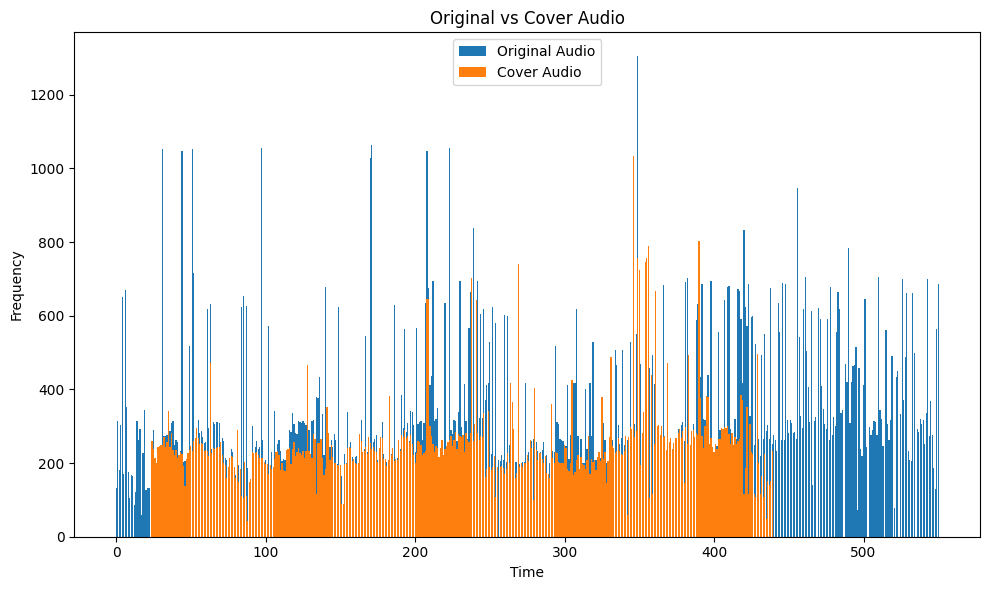

In [51]:
plt.figure(figsize=(10, 6))
# plt.bar(org_df.index[100:200], org_df['freq'][100:200], label='Original Audio')
# plt.bar(tee_df.index[100:200], tee_df['freq'][100:200], label='Cover Audio')
plt.bar(org_df.index, org_df['freq'], label='Original Audio')
plt.bar(tee_df.index, tee_df['freq'], label='Cover Audio')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Original vs Cover Audio')
plt.legend()
plt.tight_layout()
plt.show()

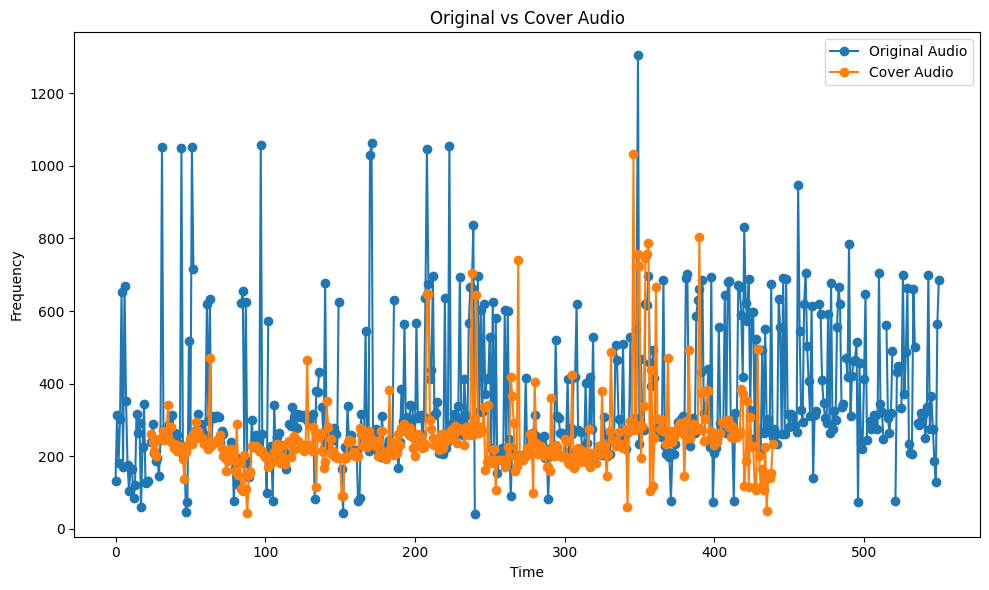

In [50]:
plt.figure(figsize=(10, 6))
# plt.plot(org_df.index[100:200], org_df['freq'][100:200], 'o-', label='Original Audio')
# plt.plot(tee_df.index[100:200], tee_df['freq'][100:200], 'o-', label='Cover Audio')
plt.plot(org_df.index, org_df['freq'], 'o-', label='Original Audio')
plt.plot(tee_df.index, tee_df['freq'], 'o-', label='Cover Audio')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Original vs Cover Audio')
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
from IPython.display import Audio

data = y_org.copy()
data2 = y_tee_full.copy()

start_frame = org_onset_frames[50]
end_frame = org_onset_frames[55]

start_time = librosa.frames_to_time(start_frame, sr=sr_org)
end_time = librosa.frames_to_time(end_frame, sr=sr_org)

start_time = 38.846984
end_time = 39.172063

start_time = 43.189116
end_time = 43.467755

# start_frame = 5.87464853 
# end_frame = 6.22294785

# dataToRead = data[int(start_frame * sr / 1000) : int(end_frame * sr / 1000) + 1]
dataToRead = data[int(start_time * sr_org) : int(end_time * sr_org) + 1]
dataToRead2 = data2[int(start_time * sr_org) : int(end_time * sr_org) + 1]

# N = len(dataToRead)
# yf = rfft(dataToRead)
# xf = rfftfreq(N, 1 / sr)

# idx = np.argmax(np.abs(yf))
# freq = xf[idx]

In [64]:
Audio(data=dataToRead, rate=sr_org)

In [65]:
Audio(data=dataToRead2, rate=sr_org)

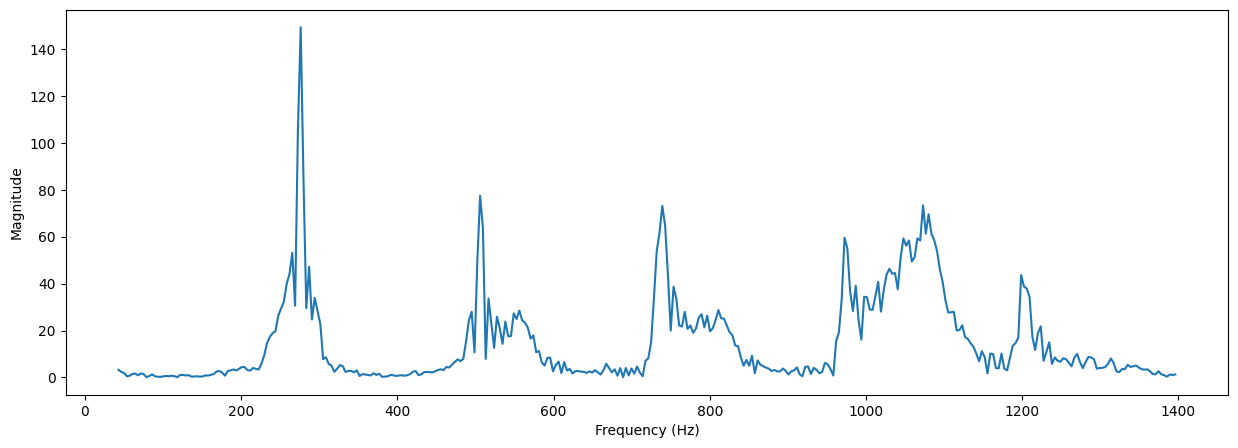

6144 276.3427734375 149.29459


In [66]:
N = len(dataToRead)
yf = rfft(dataToRead)
xf = rfftfreq(N, 1 / sr_org)

xf_filter = xf[(xf >= librosa.note_to_hz('E1')) & (xf <= librosa.note_to_hz('F6'))]
min_idx = np.argmin(xf_filter)
max_idx = np.argmax(xf_filter)
yf_filter = yf[min_idx:max_idx+1]

idx = np.argmax(np.abs(yf_filter))
freq = xf_filter[idx]
mag = abs(yf_filter[idx])

plt.figure(figsize=(15, 5))
plt.plot(xf_filter, np.abs(yf_filter))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

print(N, freq, mag)

In [49]:
org_df[org_df['freq']>1000]

,start_time,end_time,freq
31,39.473923,39.752562,1052.194170
44,43.189116,43.467755,1047.931364
51,45.696871,45.836190,1052.379848
97,59.791383,59.861043,1056.269878
170,74.768254,75.093333,1029.316765
171,75.093333,75.162993,1062.445506
208,87.353469,87.516009,1046.884478
223,92.601179,92.647619,1054.603404
349,124.853696,125.016236,1304.233233


In [46]:
# Base DataFrame
df_music = pd.DataFrame(columns = ["Name","Album" ,"Artist" ,"Genre","Subgenre","Publish Date","Duration","BPM","Vocal Rage","B0","C1","CS1","D1","DS1","E1","F1","FS1","G1","GS1","A1","AS1","B1","C2","CS2","D2","DS2","E2","F2","FS2","G2","GS2","A2","AS2","B2","C3","CS3","D3","DS3","E3","F3","FS3","G3","GS3","A3","AS3","B3","C4","CS4","D4","DS4","E4","F4","FS4","G4","GS4","A4","AS4","B4","C5","CS5","D5","DS5","E5","F5","FS5","G5","GS5","A5","AS5","B5","C6","CS6","D6","DS6","E6","F6","FS6","G6","GS6","A6","AS6","B6","C7","CS7","D7","DS7","E7","F7","FS7","G7","GS7","A7","AS7","B7","C8","CS8","D8","DS8"])
df_user = pd.DataFrame(columns = ["Name","ID","Love Artist","Love Genre","Love Subgenere","Age","-","Suitable BPM","Suitable Vocal Range","B0","C1","CS1","D1","DS1","E1","F1","FS1","G1","GS1","A1","AS1","B1","C2","CS2","D2","DS2","E2","F2","FS2","G2","GS2","A2","AS2","B2","C3","CS3","D3","DS3","E3","F3","FS3","G3","GS3","A3","AS3","B3","C4","CS4","D4","DS4","E4","F4","FS4","G4","GS4","A4","AS4","B4","C5","CS5","D5","DS5","E5","F5","FS5","G5","GS5","A5","AS5","B5","C6","CS6","D6","DS6","E6","F6","FS6","G6","GS6","A6","AS6","B6","C7","CS7","D7","DS7","E7","F7","FS7","G7","GS7","A7","AS7","B7","C8","CS8","D8","DS8"])

In [47]:
#TODO ยัดลง DB 
cache = org_df.copy()
cache['note']=librosa.hz_to_note(cache['freq'])

df = pd.DataFrame(cache['note'].value_counts().sort_index(key=lambda x: librosa.note_to_hz(x)))

df = df.transpose()
df

ValueError: cannot convert float NaN to integer

In [ ]:
# Vocal Range / Vocal Type detection

VOCAL_RAGE = {
    'Soprano':{
        'min_note':'C4',
        'max_note':'C6',
        'gender-age': 'Female'
    },
    'Mezzo-soprano':{
        'min_note':'A3',
        'max_note':'A5',
        'gender-age': 'Female'
    },
    'Contralto':{
        'min_note':'F3',
        'max_note':'F5',
        'gender-age': 'Female'
    },
    'Countertenor':{
        'min_note':'E3',
        'max_note':'E5',
        'gender-age': 'Male'
    },
    'Tenor':{
        'min_note':'C3',
        'max_note':'C5',
        'gender-age': 'Male'
    },
    'Baritone':{
        'min_note':'A2',
        'max_note':'A4',
        'gender-age': 'Male'
    },
    'Bass':{
        'min_note':'E2',
        'max_note':'E4',
        'gender-age': 'Male'
    },
    'Treble':{
        'min_note':'A3',
        'max_note':'A5',
        'gender-age': 'Child'
    }
}

VOCAL_RAGE_DF = pd.DataFrame(VOCAL_RAGE).transpose()

VOCAL_RAGE_DF['min_freq']=librosa.note_to_hz(VOCAL_RAGE_DF['min_note'])
VOCAL_RAGE_DF['max_freq']=librosa.note_to_hz(VOCAL_RAGE_DF['max_note'])

def get_vocal_range(input_df):
    df = input_df.copy()
    df = df.dropna()
    VOCAL_RAGE_DF_cache = VOCAL_RAGE_DF.copy()

    # Find the minimum and maximum pitch values
    min_pitch = min(df['freq'])
    max_pitch = max(df['freq'])
        
    # Find the closest vocal range
    VOCAL_RAGE_DF_cache['min_diff']=(VOCAL_RAGE_DF['min_freq']-min_pitch)
    VOCAL_RAGE_DF_cache['max_diff']=(VOCAL_RAGE_DF['max_freq']-max_pitch)
    
    print(min_pitch, max_pitch)
    print(VOCAL_RAGE_DF_cache)
    print(abs(VOCAL_RAGE_DF_cache['min_diff']).idxmin())
    print(abs(VOCAL_RAGE_DF_cache['max_diff']).idxmin())
    



In [ ]:
cache = tee_df.copy()
cache = cache.dropna()
cache['note']=cache['freq'].map(lambda x: librosa.hz_to_note(x) if x > 0 else None)
cache[cache['freq']>600]

,start_time,end_time,freq,mag,note
24,37.500227,37.848526,737.775029,38.662999,F♯5
97,59.791383,59.861043,731.652570,4.530757,F♯5
123,65.364172,65.666032,705.520505,62.321212,F5
158,72.632018,72.840998,664.992406,32.450655,E5
160,73.003537,73.049977,623.853659,8.251596,D♯5
165,73.676916,73.816236,724.479506,14.608843,F♯5
208,87.353469,87.516009,651.966527,35.933728,E5
209,87.516009,87.933968,693.772377,65.063751,F5
210,87.933968,88.189388,602.822652,60.159153,D5
220,91.695601,91.974240,753.416856,35.688452,F♯5


In [ ]:
cache = tee_df.copy()
cache['note']=cache['freq'].map(lambda x: librosa.hz_to_note(x) if x > 0 else None)

df = pd.DataFrame(cache['note'].value_counts().sort_index(key=lambda x: librosa.note_to_hz(x)))
# df['count'] = df['count'].map(lambda x: 1 if x > 0 else 0)

# print(cache['note'].unique())

vocal_range = get_vocal_range(cache)

df = df.transpose()
df

NameError: name 'tee_df' is not defined

In [ ]:
cache = org_df.copy()
cache.sort_values(by='freq')
cache['usr_freq'] = tee_df['freq']
cache['note_freq']=librosa.note_to_hz(librosa.hz_to_note(cache['freq']))
cache['diff_log2'] = 1+(abs(cache['freq'].map(lambda x: math.log2(x)) - cache['usr_freq'].map(lambda x: math.log2(x))))*12
cache['score'] = 1/cache['diff_log2']

cache['score'].describe()
cache

,start_time,end_time,freq,mag,usr_freq,note_freq,diff_log2,score
0,6.478367,7.407166,1036.773107,253.506348,NaN,1046.502261,NaN,NaN
1,7.407166,7.500045,1043.850659,0.319017,NaN,1046.502261,NaN,NaN
2,7.500045,7.918005,480.856027,5.606184,NaN,493.883301,NaN,NaN
3,7.918005,8.034104,723.233112,77.997734,NaN,739.988845,NaN,NaN
4,8.034104,8.312744,843.246542,109.582367,NaN,830.609395,NaN,NaN
...,...,...,...,...,...,...,...,...
548,206.216417,206.518277,980.441640,239.424850,NaN,987.766603,NaN,NaN
549,206.518277,206.866576,866.957427,140.992020,NaN,880.000000,NaN,NaN
550,206.866576,207.354195,666.441923,159.617905,NaN,659.255114,NaN,NaN
551,207.354195,207.516735,695.020921,43.605583,NaN,698.456463,NaN,NaN


In [ ]:
df_user.to_csv('DB_user.csv')
df_music.to_csv('DB_music.csv')